In [11]:
import keras
import tensorflow as tf

tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True

#Importing the VAE and RNN.
import os
import sys
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

/home/kaiolae/code/word_models_keras_test/WorldModels


In [2]:

import analyze_rnn_predictions
%load_ext autoreload
%autoreload 2 #If we want to automatically load external modules as they are updated.

/home/kaiolae/code/word_models_keras_test/WorldModels


In [3]:
#To access gym
import sys
sys.path.append('/home/kaiolae/.virtualenvs/worldmodels/lib/python3.5/site-packages')
import os

In [4]:
import fnmatch
def get_all_models():
    all_models = {} #Dict of all models, with num mixtures as key
    for folder in os.listdir('../'):
        
        if fnmatch.fnmatch(folder, 'trained_sequential_rnn_*') :
            mixtures_start_index = folder.find('rnn_')+4
            mixtures_end_index = folder.find('mixtures')
            num_mixtures = int(folder[mixtures_start_index:mixtures_end_index])
            if num_mixtures in all_models.keys():
                all_models[num_mixtures].append("../"+folder)
            else:
                all_models[num_mixtures] = ["../"+folder]
            
    return all_models
            
print(get_all_models())

{1: ['../trained_sequential_rnn_1mixtures_run10', '../trained_sequential_rnn_1mixtures_run5', '../trained_sequential_rnn_1mixtures_run2', '../trained_sequential_rnn_1mixtures_run7', '../trained_sequential_rnn_1mixtures_run11', '../trained_sequential_rnn_1mixtures_run13', '../trained_sequential_rnn_1mixtures_run9', '../trained_sequential_rnn_1mixtures_run1', '../trained_sequential_rnn_1mixtures_run14', '../trained_sequential_rnn_1mixtures_run6', '../trained_sequential_rnn_1mixtures_run3', '../trained_sequential_rnn_1mixtures_run12', '../trained_sequential_rnn_1mixtures_run8', '../trained_sequential_rnn_1mixtures_run4'], 2: ['../trained_sequential_rnn_2mixtures_run12', '../trained_sequential_rnn_2mixtures_run3', '../trained_sequential_rnn_2mixtures_run11', '../trained_sequential_rnn_2mixtures_run13', '../trained_sequential_rnn_2mixtures_run7', '../trained_sequential_rnn_2mixtures_run8', '../trained_sequential_rnn_2mixtures_run2', '../trained_sequential_rnn_2mixtures_run14', '../trained_s

In [5]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML


def plot_movie_mp4(image_array):
    dpi = 2.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    #fig = plt.figure(figsize=(1,1), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(HTML(anim.to_html5_video()))

In [6]:
from collections import namedtuple

rnn_analyzers = {}
filename = "rnn_trained_model.h5"
for key, val in get_all_models().items():
    rnn_analyzers[key] = []
    for model in val:
        if filename not in os.listdir(model):
            print("Unfinished run. Skipping.")
            continue
        print("Loading model: ", model)
        new_analyzer = analyze_rnn_predictions.RNNAnalyzer(model+"/"+filename, key, 0.2) #TODO Note, I previously used temp=0.1 - Which Ha noted was so low that we got mode collapse.
        rnn_analyzers[key].append(new_analyzer)
print("rnn analyzers: ", rnn_analyzers)

Unfinished run. Skipping.
Unfinished run. Skipping.
Loading model:  ../trained_sequential_rnn_1mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   416         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Con

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 129)                  33153     
Total params: 362,881
Trainable params: 362,881
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_1mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
___________________________________________________________________________________________

Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 32, 32, 32)   416         conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 16, 16, 32)   4128        conv2d_22[0][0]                  
________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 129)                  33153     
Total params: 362,881
Trainable params: 362,881
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_1mixtures_run3
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_1mixtures_run8
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 32, 32, 32)   416         conv2d_41[0][0]                  
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 258)                  66306     
Total params: 396,034
Trainable params: 396,034
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_2mixtures_run3
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_2mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_62 (Conv2D)              (None, 32, 32, 32)   416         conv2d_61[0][0]                  
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 16, 16, 32)   4128       

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 258)                  66306     
Total params: 396,034
Trainable params: 396,034
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_2mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_2mixtures_run4
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_81 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_82 (Conv2D)              (None, 32, 32, 32)   416         conv2d_81[0][0]                  
__________________________________________________________________________________________________
conv2d_83 (Conv2D)              (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 258)                  66306     
Total params: 396,034
Trainable params: 396,034
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_2mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_8mixtures_run11
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_101 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_102 (Conv2D)             (None, 32, 32, 32)   416         conv2d_101[0][0]                 
__________________________________________________________________________________________________
conv2d_103 (Conv2D)             (None, 16, 16, 32)   4128       

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 1032)                 265224    
Total params: 594,952
Trainable params: 594,952
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_8mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_8mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_121 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_122 (Conv2D)             (None, 32, 32, 32)   416         conv2d_121[0][0]                 
__________________________________________________________________________________________________
conv2d_123 (Conv2D)             (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 1032)                 265224    
Total params: 594,952
Trainable params: 594,952
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_8mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
___________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_4mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_141 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_142 (Conv2D)             (None, 32, 32, 32)   416         conv2d_141[0][0]                 
__________________________________________________________________________________________________
conv2d_143 (Conv2D)             (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 516)                  132612    
Total params: 462,340
Trainable params: 462,340
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_4mixtures_run3
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_4mixtures_run1
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_161 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_162 (Conv2D)             (None, 32, 32, 32)   416         conv2d_161[0][0]                 
__________________________________________________________________________________________________
conv2d_163 (Conv2D)             (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 516)                  132612    
Total params: 462,340
Trainable params: 462,340
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_4mixtures_run11
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
___________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_4mixtures_run14
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_181 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_182 (Conv2D)             (None, 32, 32, 32)   416         conv2d_181[0][0]                 
__________________________________________________________________________________________________
conv2d_183 (Conv2D)             (None, 16, 16, 32)   4128       

In [7]:
#Get a start video
#Getting data to feed into the VAE and RNN
import numpy as np
import os
# load preprocessed data
training_data = np.load(os.path.join("../rnn_data_64_dim", "rnn_training_data.npz"))
action_data = training_data['action']
observation_data = training_data['latent']

episode_num = 16
single_action_sequence = action_data[episode_num]
single_latent_sequence = observation_data[episode_num]
print("Actions length: ", len(single_action_sequence))
print("Latent vectors length: ", len(single_latent_sequence))
num_frames = len(single_latent_sequence)



#Decode all 100 vectors, store as video
#Visualize video.

Actions length:  177
Latent vectors length:  177


In [ ]:
#Decode a sequence with the VAE and visualize it
def decode_and_visualize(latent_vector_sequence, rnn_analyzer):
    plot_movie_mp4(rnn_analyzer.decode_with_vae(latent_vector_sequence))

### Visualizing one sequence of latent vectors from the training data

In [ ]:
#From the actual sampled images. All loss here is due to VAE.
rnn1_analyzer = rnn_analyzers[2][0]
decode_and_visualize(single_latent_sequence, rnn1_analyzer)

In [ ]:
#Generating a dream.
action = 0 #Consider random action. Or, when predicting step by step, use the actual action
dreamed_zs1 = []
dreamed_z, mixture_weights = rnn1_analyzer.predict_one_step(action, previous_z=single_latent_sequence[0])
dreamed_zs1.append(dreamed_z)
print(dreamed_z)
for i in range(100):
    dreamed_z, mixture_weights = rnn1_analyzer.predict_one_step(action)
    dreamed_zs1.append(dreamed_z)
    

In [ ]:
#Visualizing the dream
decode_and_visualize(dreamed_zs1, rnn1_analyzer)

In [ ]:
#Generating a dream with 16 mixtures
action = 0 #Consider random action. Or, when predicting step by step, use the actual action
dreamed_zs16 = []
dreamed_z = rnn16_analyzer.predict_one_step(action, previous_z=single_latent_sequence[0])
dreamed_zs16.append(dreamed_z)
for i in range(100):
    dreamed_zs16.append(rnn16_analyzer.predict_one_step(action))
#Visualizing the dream
decode_and_visualize(dreamed_zs16, rnn16_analyzer)

# 

In [ ]:
vae = rnn_analyzers[2][0].vae
print(single_latent_sequence.shape)
vae.decoder.predict(single_latent_sequence)

In [ ]:
#TODO Make sure to "warm up" the LSTM with many inputs before recording."

#TODO Without reset, I got the expected result. But with reset, differences between RNNs disappear.
#Do differences for some reason only appear after a (large) number of iterations??
#One solution might be to run 1000 timesteps, to ensure we get into the internal state that
#exposes differences.
#Also, randomizing initial_z could help.
#Yes, longer sequences seemed to work.

#TODO A better measure of creativity is differences between consecutive frames. Did a ball appear/disappear, etc?
#Test plotting that with "fireball_delta"/monster_delta
import count_monsters_and_balls
import importlib
import pandas as pd
import test_creativity_stability
importlib.reload(test_creativity_stability)

initial_z = single_latent_sequence[0]
EPISODE_LENGTHS = 1000
zero_actions = [0 for i in range(EPISODE_LENGTHS)]

#TODO These should both instead reflect the difference from initial_z, since we want to
#measure creativity.

#Collecting data for all treatments
dream_data = []
NUM_STATISTICAL_TESTS = 1

for i in range(NUM_STATISTICAL_TESTS):
    for num_mixtures, rnn_model_list in rnn_analyzers.items():
        
        print(num_mixtures)
        #Having some trouble here with 8 mixtures. Skipping.
        if int(num_mixtures)==8:
            continue
        for rnn_model in rnn_model_list:
            print("analyzing ", num_mixtures)            
            rnn_model._reset()
            rnn_model.warm_up_lstm(single_action_sequence, single_latent_sequence)
            e = test_creativity_stability.count_events_on_trained_rnn(rnn_model.vae, rnn_model, initial_z, zero_actions, EPISODE_LENGTHS)
            d = test_creativity_stability.count_appearances_and_disappearances(rnn_model.vae, rnn_model, initial_z, zero_actions, EPISODE_LENGTHS)
            combined_dict = {**e, **d}
            combined_dict["num_mixtures"] = num_mixtures
            dream_data.append(combined_dict)
            
#Turning dream-data entries into dataframes, one for each treatment
dream_dataframes = pd.DataFrame(dream_data)

#TODO Something is wrong in my measurement of fireballs delta. It shouldn't be possible that it's bigger than
#num_fireballs.
#TODO should be easy to dump to file also now.
#At some point, I should split into a generate-and-dump script (this), and a load-and-analyze script.
#dream_

#TODO Not easy to see any clear effects of modifying number of mixtures.

In [ ]:
list(dream_dataframes)

In [ ]:
for num_mixtures in fireballs_dreamed.keys():
    fireball_dreams = fireballs_dreamed[num_mixtures]
    print("avg fireballs for ", num_mixtures, ": ", sum(fireball_dreams)/float(len(fireball_dreams)))
    monster_dreams = monsters_dreamed[num_mixtures]

In [ ]:
print(fb1)

In [ ]:
#Testing differences between real and predicted images. Rather than dreaming up many steps ahead, we here
#Dream 1 step ahead, and compare to what actually happened. Tests stability of the prediction.
errors = [] #With 1 entry for each model, showing its parameters and results
initial_z = single_latent_sequence[0]

NUM_STATISTICAL_TESTS = 1
from test_creativity_stability import count_differences_between_reality_and_prediction

print(single_latent_sequence.shape)
#TODO Is this short sequence hiding differences? Making a fake long sequence by concatenating.
extended_latent_sequence = []
for i in range(10):
    for latent in single_latent_sequence:
        extended_latent_sequence.append(latent)
extended_latent_sequence = np.array(extended_latent_sequence)
#padded_action_sequence = np.append(single_action_sequence, 0)
extended_actions = np.repeat(single_action_sequence, 10)

print(extended_actions.shape)
print(extended_latent_sequence.shape)

for i in range(NUM_STATISTICAL_TESTS):
    for num_mixtures, rnn_model_list in rnn_analyzers.items():
        #Having some trouble here with 8 mixtures. Skipping.
        if int(num_mixtures)==8:
            continue
        for rnn_model in rnn_model_list:      
            print("Analyzing ", rnn_model)
            rnn_model._reset()
            rnn_model.warm_up_lstm(single_action_sequence, single_latent_sequence)
            
            e = count_differences_between_reality_and_prediction(rnn_model.vae, rnn_model, extended_latent_sequence, extended_actions)
            e['num_mixtures'] = num_mixtures
            errors.append(e)
            
#Turning entries into dataframes, one for each treatment
error_dataframes = pd.DataFrame(errors)
print(error_dataframes)


In [8]:

def calc_mixture_weights_and_events_dreaming(rnn_analyzer, dream_steps=100):
    #Analyzing a single model
    WARM_UP_STEPS = 100
    previous_z = single_latent_sequence[WARM_UP_STEPS]

    mixture_weight_history = []
    z_history = []
    rnn_analyzer._reset()
    rnn_analyzer.warm_up_lstm(single_action_sequence, single_latent_sequence)
    for i in range(dream_steps):
        previous_z, mixture_weights = rnn_analyzer.predict_one_step(0, previous_z)
        z_history.append(previous_z)
        mixture_weight_history.append(mixture_weights)
    return np.array(mixture_weight_history), np.array(z_history)

In [86]:
import matplotlib.gridspec as gridspec
def visualize_mixture_weights_and_events(weights_sequence, z_sequence, rnn_analyzer):
    plt.plot(weights_sequence)
    fig = plt.figure(figsize=(20, 20))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    columns = 5
    counter = 0
    skip_image = 5
    decoded_images = rnn_analyzer.decode_with_vae(z_sequence)
    plot_counter = 0
    for d in decoded_images:
        if counter%skip_image == 0:
            if plot_counter%columns == 0:
                print("Timestep: ", counter)
            #f = plt.figure(figsize=(10,10))
            #ax = f.add_subplot((len(z_sequence)//skip_image)//columns + 1, columns, plot_counter+1)
            ax1 = plt.subplot((len(z_sequence)//skip_image)//columns + 1, columns, plot_counter+1)
            ax1.set_xticklabels([])
            ax1.set_yticklabels([])
            plt.imshow(d)
            plot_counter+=1
        counter+=1

zs are  [[-0.61946557 -0.19441193  0.2858329  ... -0.08373902  0.75793164
   0.21662706]
 [-0.79499027 -0.06105459  0.21832028 ...  0.36444177  0.54799998
   0.48250105]
 [-0.8126638  -0.15294036  0.26870884 ...  0.08820113  0.61548282
   0.62035147]
 ...
 [-2.64500246  1.46342962  0.14141817 ... -0.60933293  0.04260828
   0.69521483]
 [-2.1114163   0.45707206  0.10487209 ... -0.4620096   0.69445673
   1.03043353]
 [-1.5573864   0.56820286  0.03363726 ... -0.49962937  0.62500452
   1.80244974]]
Timestep:  0
Timestep:  25
Timestep:  50
Timestep:  75


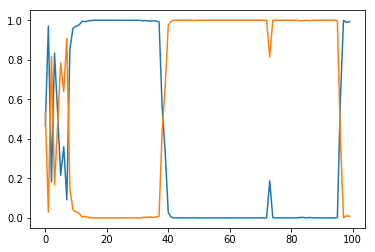

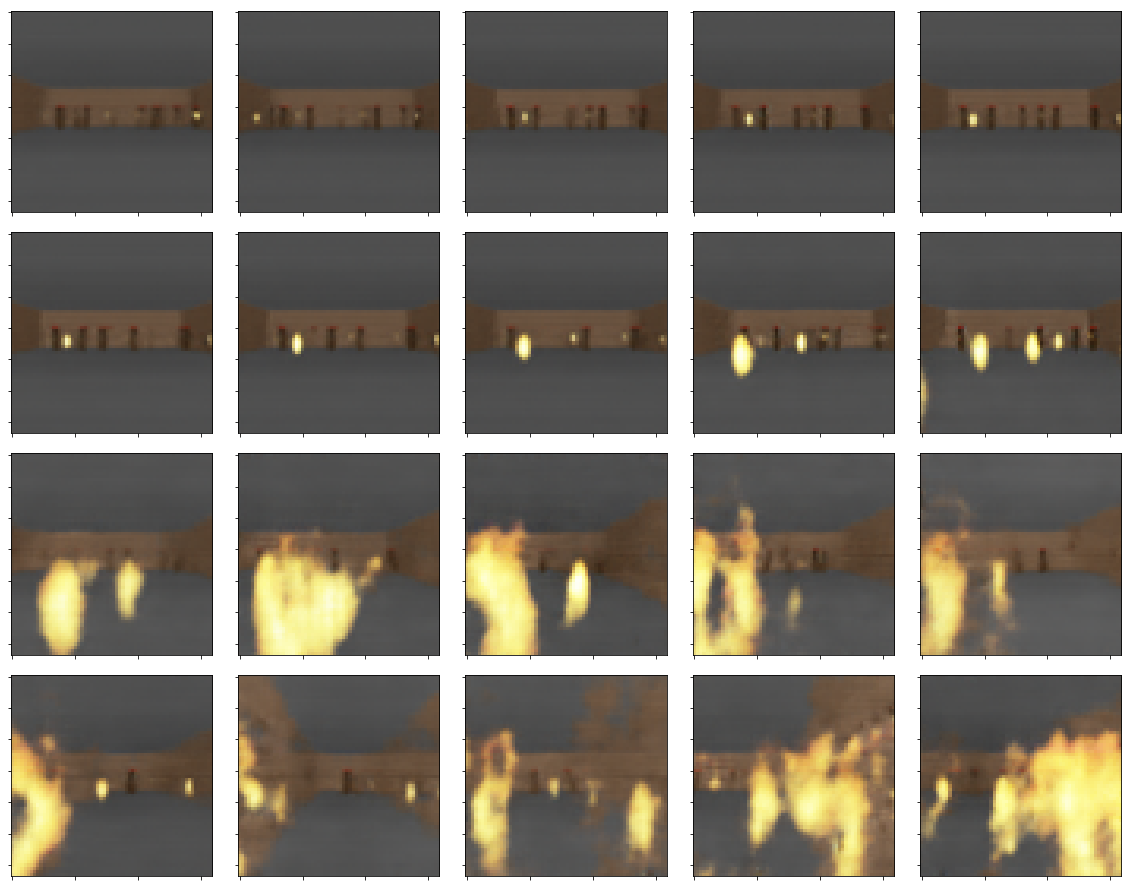

In [87]:
analyzer1= rnn_analyzers[2][3]
weights, zs = calc_mixture_weights_and_events_dreaming(analyzer1)
print("zs are ", zs)
visualize_mixture_weights_and_events(weights, zs, analyzer1)

Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Explosions:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fireballs:
[1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Left walls:
[0, 0, 0, 0]
Right walls:
[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Otherwise:
[0, 0]


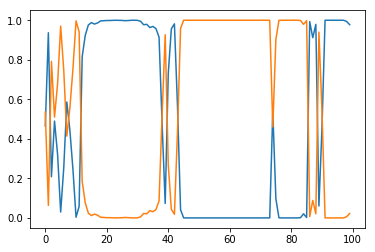

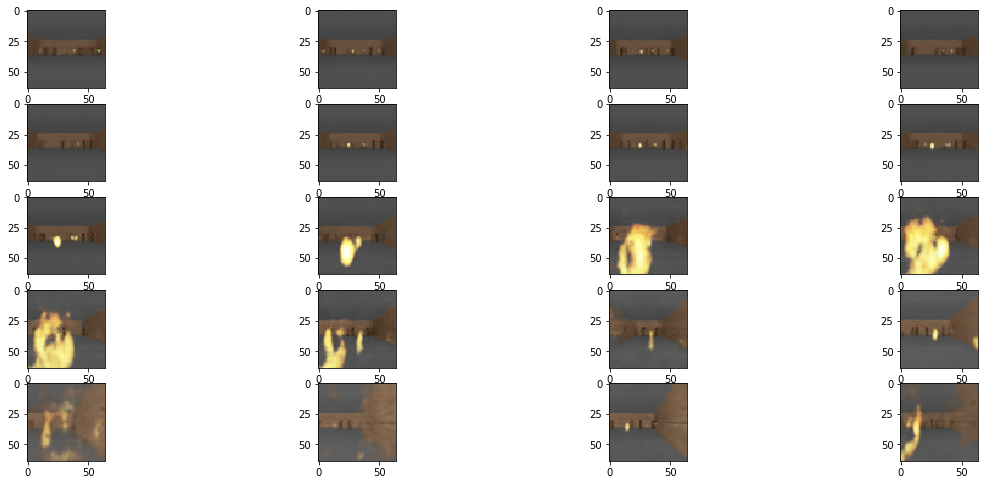

In [37]:
FIREBALL_THRESHOLD = 0.5
WALL_THRESHOLD = 0.39
import count_monsters_and_balls
# Measuring the tendency for different events to be modelled by different gaussians
#TODO Need to be able to measure the wall event too.
#Could be easy by detecting something brown where the ceiling/floor usually was.
analyzer = rnn_analyzers[2][3]
weights, zs = calc_mixture_weights_and_events_dreaming(analyzer,100)
dominating_mixture_during_explosions = []
dominating_mixture_during_fireball = []
dominating_mixture_during_wall_left = []
dominating_mixture_during_wall_right = []
dominating_mixture_otherwise = []

decoded_images = analyzer.decode_with_vae(zs)
visualize_mixture_weights_and_events(weights, zs, analyzer)
for img_counter in range(len(decoded_images)):
    img = decoded_images[img_counter]
    weight_vector = weights[img_counter]
    dominating_mixture = np.argmax(weight_vector)
    is_exploding = count_monsters_and_balls.is_there_a_big_explosion(img, FIREBALL_THRESHOLD)
    is_fireball, _ = count_monsters_and_balls.count_fireballs(img, FIREBALL_THRESHOLD)
    is_left_wall = count_monsters_and_balls.is_there_a_lefthand_wall(img, WALL_THRESHOLD)
    is_right_wall = count_monsters_and_balls.is_there_a_righthand_wall(img, WALL_THRESHOLD)

    no_events_seen = True
    if is_exploding:
        dominating_mixture_during_explosions.append(dominating_mixture)
        no_events_seen = False
    elif is_fireball:
        dominating_mixture_during_fireball.append(dominating_mixture)
        no_events_seen = False
    
    if is_left_wall:
        dominating_mixture_during_wall_left.append(dominating_mixture)
        no_events_seen = False
    if is_right_wall:
        dominating_mixture_during_wall_right.append(dominating_mixture)
        no_events_seen = False
        
    if no_events_seen:
        dominating_mixture_otherwise.append(dominating_mixture) #TODO Add walls
        
print("Explosions:")
print(dominating_mixture_during_explosions)
print("Fireballs:")
print(dominating_mixture_during_fireball)  
print("Left walls:")
print(dominating_mixture_during_wall_left)  
print("Right walls:")
print(dominating_mixture_during_wall_right)  
print("Otherwise:")      
print(dominating_mixture_otherwise)

In [ ]:
for num_mixtures in fireballs_dreamed.keys():
    err = errors[num_mixtures]
    print("avg errors for ", num_mixtures, ": ", sum(err)/float(len(err)))

#Preliminary conclusion: Many mixtures (8/16) give more creativity, being able to "imagine" more fireballs,
#but also more inaccuracies, by imagining fireballs that shouldnt be there.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#print(sns.load)
g=sns.boxplot(x="num_mixtures", y="num_fireballs", data=dream_dataframes)
g.set(ylim=(None, 10000))
sns.despine()
#plt.show()

#Plotting fireballs per episode

In [ ]:
sns.boxenplot(x="num_mixtures", y="num_with_explosion", data=dream_dataframes)
sns.despine()

In [ ]:
sns.boxenplot(x="num_mixtures", y="num_initiated_explosions", data=dream_dataframes)
sns.despine()

In [ ]:
images_with_explosion = dream_dataframes["with_explosion"]
num_mixtures = dream_dataframes["num_mixtures"]
#print(num_mixtures)
print(len(images_with_explosion[25]))
plot_movie_mp4(np.array(images_with_explosion[25]))

In [ ]:
sns.boxenplot(x="num_mixtures", y="fireball_delta", data=dream_dataframes)
sns.despine()

In [ ]:
sns.boxenplot(x="num_monsters", y="fireball_delta", data=dream_dataframes)
sns.despine()

In [ ]:
sns.boxenplot(x="num_mixtures", y="imagined_fireballs", data=error_dataframes)
sns.despine()

In [ ]:
sns.boxenplot(x="num_mixtures", y="imagined_monsters", data=error_dataframes)
sns.despine()

In [ ]:
sns.boxenplot(x="num_mixtures", y="missing_monsters", data=error_dataframes)
sns.despine() #TODO Seems to be no disadvantage to being creative here - 16 gives low errors. Maybe if I let it dream for more frames?

In [ ]:
sns.boxenplot(x="num_mixtures", y="missing_fireballs", data=error_dataframes)
sns.despine()

In [ ]:
#Plotting monsters per episode
#print(sns.load)
monsters_data=[]
for error_dataframes
monsters_data = np.array([m1, m4, m8, m16])
monsters_data = pd.DataFrame(monsters_data.T)
monsters_data.columns = ['1', '4', '8', '16']

sns.boxenplot(data=monsters_data, palette='Blues')
sns.despine()
#plt.show()

boxplot_data.describe()

In [ ]:
#Statistical test
from scipy.stats import mannwhitneyu
print("statistical difference in fireballs with 1 vs 4 mixtures")
print(mannwhitneyu(fb1, fb4))
print("statistical difference in fireballs with 4 vs 16 mixtures")
print(mannwhitneyu(fb4, fb16))

In [ ]:
#Missing fireballs
missing_fireballs_data = np.array([mf1, mf4, mf8, mf16])
missing_fireballs_data = pd.DataFrame(missing_fireballs_data.T)
missing_fireballs_data.columns = ['1', '4', '8', '16']
sns.boxenplot(data=missing_fireballs_data)


In [ ]:
#Imagined fireballs
imagined_fireballs_data = np.array([if1, if4, if8, if16])
imagined_fireballs_data = pd.DataFrame(imagined_fireballs_data.T)
imagined_fireballs_data.columns = ['1', '4', '8', '16']
sns.boxenplot(data=imagined_fireballs_data)

In [ ]:
#Total prediction errors
prediction_errors = np.array([errors1, errors4, errors8, errors16])
prediction_errors_data = pd.DataFrame(prediction_errors.T)
prediction_errors_data.columns = ['1', '4', '8', '16']
sns.boxenplot(data=prediction_errors_data)

In [ ]:
#Making a "pareto plot" of creativity vs precision
#TODO Change my measurements, to measure these two on the same rollouts.
#TODO Each datapoint should represent a single model - I need to run multiple trainings of each model.
creativity_precision_data=[] #Tuples (treatment, creativity, precision)
all_precision_data = [errors1, errors4, errors8, errors16] #TODO Replace with more complete data
all_creativity_data = [fb1, fb4, fb8, fb16]
creativity_prediction_data_summed=[]
for treatment_counter in range(len(all_precision_data)):
    treatment_precision = all_precision_data[treatment_counter]
    treatment_creativity = all_creativity_data[treatment_counter]
    current_treatment_summed=[0, 0]
    for i in range(len(treatment_precision)):
        creativity_precision_data.append(["Treatment"+str(treatment_counter), treatment_precision[i], treatment_creativity[i]])
        current_treatment_summed[0]=current_treatment_summed[0]+treatment_precision[i]
        current_treatment_summed[1]=current_treatment_summed[1]+treatment_creativity[i]
    creativity_prediction_data_summed.append(current_treatment_summed)
print(creativity_precision_data)

In [ ]:
#TODO May become quite interesting with more data points.
creativity_precision_data_summed = np.array(creativity_precision_data_summed)
print(creativity_precision_data_summed)
creativity_precision_dataframe = pd.DataFrame({"Treatment":["1","4","8","16"],
                                               "precision-error":creativity_precision_data_summed[:,0],
                                               "creativity":creativity_precision_data_summed[:,1]})
sns.scatterplot(x="precision-error", y="creativity", data=creativity_precision_dataframe, style="Treatment")

In [ ]:

creativity_precision_data=np.array(creativity_precision_data)
creativity_precision_dataframe = pd.DataFrame({"Treatment":creativity_precision_data[:,0],
                                               "precision-error":creativity_precision_data[:,1],
                                               "creativity":creativity_precision_data[:,2]})
creativity_precision_dataframe = creativity_precision_dataframe.apply(pd.to_numeric, errors='ignore')
print(creativity_precision_dataframe.dtypes)
print(creativity_precision_dataframe)
sns.scatterplot(x="creativity", y="precision-error", data=creativity_precision_dataframe, style="Treatment")

In [ ]:
tips = sns.load_dataset("tips")
print(tips)
sns.scatterplot(x="tip", y="total_bill", data=tips)